# Berlin Trees Visualizations

## Notebook Setup
1. Importing relevant libraries
2. Importing the Dataset
3. inspect data
4. Checking Data types

In [1]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [2]:
#pip install plotly==5.8.2


In [3]:
#import plotly.express as px

In [4]:
df = pd.read_csv('berlin_trees_data.csv')

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf


In [6]:
df.dtypes

Unnamed: 0                  int64
ID                         object
Baum Nr.                   object
Objektnr.                  object
Objektname                 object
Baumart deutsch            object
Baumart botanisch          object
Gattung botanisch          object
Straße                     object
Hausnr.                    object
Hausnr. Zusatz             object
Pflanzjahr                  int64
Standalter                  int64
Krone Durchmesser in m    float64
Stamm Umfang in cm        float64
Baumhöhe in m             float64
Bezirk                     object
dtype: object

In [7]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Baum Nr.', 'Objektnr.', 'Objektname',
       'Baumart deutsch', 'Baumart botanisch', 'Gattung botanisch', 'Straße',
       'Hausnr.', 'Hausnr. Zusatz', 'Pflanzjahr', 'Standalter',
       'Krone Durchmesser in m', 'Stamm Umfang in cm', 'Baumhöhe in m',
       'Bezirk'],
      dtype='object')


# Top 10 Trees per District Visualization
1. Check for Districts
2. Group by District
3. Make groups
4. Filter for top 10 trees

In [8]:
print(df['Bezirk'].unique())

['Charlottenburg-Wilmersdorf' 'Friedrichshain-Kreuzberg' 'Lichtenberg'
 'Marzahn-Hellersdorf' 'Neukölln' 'Pankow' 'Reinickendorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Treptow-Köpenick']


In [9]:
### Splitting Groups per district

df_district = df.groupby(['Bezirk'])

In [10]:
### Defining groups
df_lichtenberg = df_district.get_group('Lichtenberg')

In [11]:
### Filter out top 10 District trees

df_trees_in_lichtenberg = df_lichtenberg['Baumart deutsch'].value_counts()

In [12]:
type(df_trees_in_lichtenberg)


pandas.core.series.Series

<AxesSubplot:title={'center':'Top Ten Trees in Lichtenberg'}>

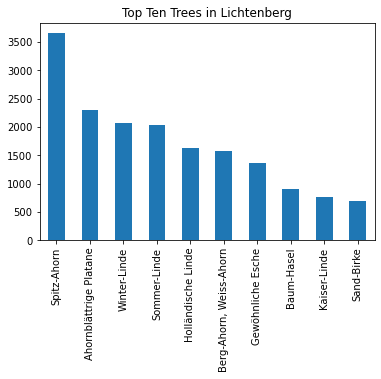

In [13]:
df_trees_in_lichtenberg.head(10).plot.bar(title="Top Ten Trees in Lichtenberg")

# Top 10 Strees with most trees per District Visualization


In [14]:
df_streets_in_lichtenberg = df_lichtenberg['Straße'].value_counts()

<AxesSubplot:title={'center':'Streets with most Trees in Lichtenberg'}>

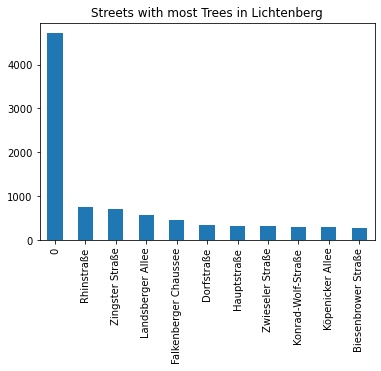

In [15]:
df_streets_in_lichtenberg.head(11).plot.bar(title="Streets with most Trees in Lichtenberg")

## Top Trees
1. oldest
2. highest

In [16]:
df_lichtenberg['Baumhöhe in m'].idxmax

<bound method Series.idxmax of 58684    17.0
58685    10.0
58686    25.0
58687    25.0
58688    25.0
         ... 
90279     3.0
90280     3.0
90281     3.0
90282     3.0
90283     3.0
Name: Baumhöhe in m, Length: 31600, dtype: float64>

In [17]:
### Heighest Tree
max_height_in_lichtenberg = df_lichtenberg['Baumhöhe in m'].idxmax()
heighest_tree_in_lichtenberg = df_lichtenberg.loc[[max_height_in_lichtenberg]]
print(heighest_tree_in_lichtenberg)

       Unnamed: 0           ID Baum Nr. Objektnr.  \
58747       58747  11635:42:00       28    29SB14   

                               Objektname                Baumart deutsch  \
58747  Rummelsburger Bucht / Paul & Paula  Italienische Pyramiden-Pappel   

             Baumart botanisch Gattung botanisch       Straße Hausnr.  \
58747  Populus nigra 'Italica'           POPULUS  Hauptstraße       0   

      Hausnr. Zusatz  Pflanzjahr  Standalter  Krone Durchmesser in m  \
58747              0        1963          59                     NaN   

       Stamm Umfang in cm  Baumhöhe in m       Bezirk  
58747               186.0           40.0  Lichtenberg  


In [18]:
### Oldest Tree
max_age_in_lichtenberg = df_lichtenberg['Standalter'].idxmax()
oldest_tree_in_lichtenberg = df_lichtenberg.loc[[max_age_in_lichtenberg]]
print(oldest_tree_in_lichtenberg)

       Unnamed: 0                 ID Baum Nr. Objektnr.        Objektname  \
69547       69547  00008100:002cea39       33    31SB42  Zwieseler Straße   

      Baumart deutsch         Baumart botanisch Gattung botanisch  \
69547     Hänge-Birke  Betula pendula 'Tristis'            BETULA   

                 Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  \
69547  Zwieseler Straße       0              0           1        2021   

       Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m       Bezirk  
69547                     1.0                12.0            5.0  Lichtenberg  
